# Run model module locally

In [22]:
import math
import os

def convert_conv_layer_property_lists_to_string(property_list, prop_list_len):
    """Convert conv layer property list to string.

    Args:
        property_list: list, nested list of blocks of a conv layer property.
        prop_list_len: int, length of list to process.

    Returns:
        Doubly delimited string of conv layer property values.
    """
    return (";").join(
        [
            (",").join([str(val) for val in block])
            for block in property_list[0:prop_list_len]
        ]
    )
    

# Import os environment variables for file hyperparameters.
os.environ["TRAIN_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/pgan/data/train*.tfrecord"
os.environ["EVAL_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/pgan/data/test*.tfrecord"
os.environ["OUTPUT_DIR"] = "gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model"

# Import os environment variables for train hyperparameters.
os.environ["TRAIN_BATCH_SIZE"] = str(8)
os.environ["TRAIN_STEPS"] = str(100)

# Import os environment variables for eval hyperparameters.
os.environ["EVAL_BATCH_SIZE"] = str(8)
os.environ["EVAL_STEPS"] = str(10)
os.environ["START_DELAY_SECS"] = str(6000)
os.environ["THROTTLE_SECS"] = str(6000)

# Import os environment variables for serving hyperparameters.
os.environ["EXPORTS_TO_KEEP"] = str(20)
os.environ["PREDICT_ALL_RESOLUTIONS"] = "True"
os.environ["ANOMALY_THRESHOLD"] = str(5.0)
os.environ["ANOM_CONVEX_COMBO_FACTOR"] = str(0.05)

# Import os environment variables for image hyperparameters.
os.environ["HEIGHT"] = str(32)
os.environ["WIDTH"] = str(32)
os.environ["DEPTH"] = str(3)

# Import os environment variables for shared hyperparameters.
os.environ["NUM_STEPS_UNTIL_GROWTH"] = str(10)

# Full lists for full 1024x1024 network growth.
full_conv_num_filters = [[512, 512], [512, 512], [512, 512], [512, 512], [256, 256], [128, 128], [64, 64], [32, 32], [16, 16]]
full_conv_kernel_sizes = [[4, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3]]
full_conv_strides = [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]]

# Set final image size as a multiple of 2, starting at 4.
image_size = 32
prop_list_len = max(
    min(int(math.log(image_size, 2) - 1), len(full_conv_num_filters)), 1
)

# Get slices of lists.
conv_num_filters = convert_conv_layer_property_lists_to_string(
    full_conv_num_filters, prop_list_len
)
print("conv_num_filters = {}".format(conv_num_filters))
conv_kernel_sizes = convert_conv_layer_property_lists_to_string(
    full_conv_kernel_sizes, prop_list_len
)
print("conv_kernel_sizes = {}".format(conv_kernel_sizes))
conv_strides = convert_conv_layer_property_lists_to_string(
    full_conv_strides, prop_list_len
)
print("conv_strides = {}".format(conv_strides))

os.environ["CONV_NUM_FILTERS"] = conv_num_filters
os.environ["CONV_KERNEL_SIZES"] = conv_kernel_sizes
os.environ["CONV_STRIDES"] = conv_strides

# Import os environment variables for generator hyperparameters.
os.environ["LATENT_SIZE"] = str(512)
os.environ["NORMALIZE_LATENT"] = "True"
os.environ["USE_PIXEL_NORM"] = "True"
os.environ["PIXEL_NORM_EPSILON"] = str(1e-8)
os.environ["GENERATOR_PROJECTION_DIMS"] = "4,4,512"
os.environ["GENERATOR_L1_REGULARIZATION_SCALE"] = str(0.01)
os.environ["GENERATOR_L2_REGULARIZATION_SCALE"] = str(0.01)
os.environ["GENERATOR_OPTIMIZER"] = "Adam"
os.environ["GENERATOR_LEARNING_RATE"] = str(0.0001)
os.environ["GENERATOR_CLIP_GRADIENTS"] = str(5.0)
os.environ["GENERATOR_TRAIN_STEPS"] = str(1)

# Import os environment variables for discriminator hyperparameters.
os.environ["USE_MINIBATCH_STDDEV"] = "True"
os.environ["MINIBATCH_STDDEV_GROUP_SIZE"] = str(4)
os.environ["MINIBATCH_STDDEV_AVERAGING"] = "True"
os.environ["DISCRIMINATOR_L1_REGULARIZATION_SCALE"] = str(0.01)
os.environ["DISCRIMINATOR_L2_REGULARIZATION_SCALE"] = str(0.01)
os.environ["DISCRIMINATOR_OPTIMIZER"] = "Adam"
os.environ["DISCRIMINATOR_LEARNING_RATE"] = str(0.0001)
os.environ["DISCRIMINATOR_CLIP_GRADIENTS"] = str(5.0)
os.environ["DISCRIMINATOR_GRADIENT_PENALTY_COEFFICIENT"] = str(10.0)
os.environ["EPSILON_DRIFT"] = str(0.001)
os.environ["DISCRIMINATOR_TRAIN_STEPS"] = str(1)

# Import os environment variables for encoder hyperparameters.
os.environ["ENCODER_L1_REGULARIZATION_SCALE"] = str(0.01)
os.environ["ENCODER_L2_REGULARIZATION_SCALE"] = str(0.01)
os.environ["ENCODER_OPTIMIZER"] = "Adam"
os.environ["ENCODER_LEARNING_RATE"] = str(0.0001)
os.environ["ENCODER_CLIP_GRADIENTS"] = str(5.0)


conv_num_filters = 512,512;512,512;512,512;512,512
conv_kernel_sizes = 4,3;3,3;3,3;3,3
conv_strides = 1,1;1,1;1,1;1,1


## Train pg_AnoGAN_Sim_Enc model

In [25]:
%%bash
gsutil rm -rf ${OUTPUT_DIR}
export PYTHONPATH=$PYTHONPATH:$PWD/pg_anogan_sim_enc_module
python3 -m trainer.task \
    --train_file_pattern=${TRAIN_FILE_PATTERN} \
    --eval_file_pattern=${EVAL_FILE_PATTERN} \
    --output_dir=${OUTPUT_DIR} \
    --job-dir=./tmp \
    \
    --train_batch_size=${TRAIN_BATCH_SIZE} \
    --train_steps=${TRAIN_STEPS} \
    \
    --eval_batch_size=${EVAL_BATCH_SIZE} \
    --eval_steps=${EVAL_STEPS} \
    --start_delay_secs=${START_DELAY_SECS} \
    --throttle_secs=${THROTTLE_SECS} \
    \
    --exports_to_keep=${EXPORTS_TO_KEEP} \
    --predict_all_resolutions=${PREDICT_ALL_RESOLUTIONS} \
    --anomaly_threshold=${ANOMALY_THRESHOLD} \
    --anom_convex_combo_factor=${ANOM_CONVEX_COMBO_FACTOR} \
    \
    --height=${HEIGHT} \
    --width=${WIDTH} \
    --depth=${DEPTH} \
    \
    --num_steps_until_growth=${NUM_STEPS_UNTIL_GROWTH} \
    --conv_num_filters=${CONV_NUM_FILTERS} \
    --conv_kernel_sizes=${CONV_KERNEL_SIZES} \
    --conv_strides=${CONV_STRIDES} \
    \
    --latent_size=${LATENT_SIZE} \
    --normalize_latent=${NORMALIZE_LATENT} \
    --use_pixel_norm=${USE_PIXEL_NORM} \
    --pixel_norm_epsilon=${PIXEL_NORM_EPSILON} \
    --generator_projection_dims=${GENERATOR_PROJECTION_DIMS} \
    --generator_l1_regularization_scale=${GENERATOR_L1_REGULARIZATION_SCALE} \
    --generator_l2_regularization_scale=${GENERATOR_L2_REGULARIZATION_SCALE} \
    --generator_optimizer=${GENERATOR_OPTIMIZER} \
    --generator_learning_rate=${GENERATOR_LEARNING_RATE} \
    --generator_clip_gradients=${GENERATOR_CLIP_GRADIENTS} \
    --generator_train_steps=${GENERATOR_TRAIN_STEPS} \
    \
    --use_minibatch_stddev=${USE_MINIBATCH_STDDEV} \
    --minibatch_stddev_group_size=${MINIBATCH_STDDEV_GROUP_SIZE} \
    --minibatch_stddev_averaging=${MINIBATCH_STDDEV_AVERAGING} \
    --discriminator_l1_regularization_scale=${DISCRIMINATOR_L1_REGULARIZATION_SCALE} \
    --discriminator_l2_regularization_scale=${DISCRIMINATOR_L2_REGULARIZATION_SCALE} \
    --discriminator_optimizer=${DISCRIMINATOR_OPTIMIZER} \
    --discriminator_learning_rate=${DISCRIMINATOR_LEARNING_RATE} \
    --discriminator_clip_gradients=${DISCRIMINATOR_CLIP_GRADIENTS} \
    --discriminator_gradient_penalty_coefficient=${DISCRIMINATOR_GRADIENT_PENALTY_COEFFICIENT} \
    --epsilon_drift=${EPSILON_DRIFT} \
    --discriminator_train_steps=${DISCRIMINATOR_TRAIN_STEPS} \
    \
    --encoder_l1_regularization_scale=${ENCODER_L1_REGULARIZATION_SCALE} \
    --encoder_l2_regularization_scale=${ENCODER_L2_REGULARIZATION_SCALE} \
    --encoder_optimizer=${ENCODER_OPTIMIZER} \
    --encoder_learning_rate=${ENCODER_LEARNING_RATE} \
    --encoder_clip_gradients=${ENCODER_CLIP_GRADIENTS}


decode_example: features = {'image_raw': FixedLenFeature(shape=[], dtype=tf.string, default_value=None), 'label': FixedLenFeature(shape=[], dtype=tf.int64, default_value=None)}
decode_example: image = Tensor("DecodeRaw:0", shape=(?,), dtype=uint8)
decode_example: image = Tensor("Reshape:0", shape=(32, 32, 3), dtype=uint8)
preprocess_image: image = Tensor("sub:0", shape=(32, 32, 3), dtype=float32)
decode_example: image = Tensor("sub:0", shape=(32, 32, 3), dtype=float32)
decode_example: label = Tensor("Cast_1:0", shape=(), dtype=int32)

pg_anogan_sim_enc_model: features = {'image': <tf.Tensor 'IteratorGetNext:0' shape=(?, 32, 32, 3) dtype=float32>}
pg_anogan_sim_enc_model: labels = Tensor("IteratorGetNext:1", shape=(?,), dtype=int32, device=/device:CPU:0)
pg_anogan_sim_enc_model: mode = train
pg_anogan_sim_enc_model: params = {'train_file_pattern': 'gs://machine-learning-1234-bucket/gan/pgan/data/train*.tfrecord', 'eval_file_pattern': 'gs://machine-learning-1234-bucket/gan/pgan/data/tes

Removing gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model/#1591542073343893...
Removing gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model/checkpoint#1591542541206096...
Removing gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model/eval/#1591542586128740...
Removing gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model/eval/events.out.tfevents.1591542586.tf-1-15#1591542588370264...
/ [4 objects]                                                                   
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m rm ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Removing gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model/events.out.tfevents.1591542076.tf-1-15#1591542545578207...
Removing gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/traine

## Predictions

In [29]:
import numpy as np
import tensorflow as tf

In [30]:
# Get data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("x_train.shape = {}".format(x_train.shape))
print("y_train.shape = {}".format(y_train.shape))
print("x_test.shape = {}".format(x_test.shape))
print("y_test.shape = {}".format(y_test.shape))

x_train.shape = (50000, 32, 32, 3)
y_train.shape = (50000, 1)
x_test.shape = (10000, 32, 32, 3)
y_test.shape = (10000, 1)


In [26]:
!gsutil ls gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model/export/exporter | tail -1

gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model/export/exporter/1591543598/


In [31]:
predict_fn = tf.contrib.predictor.from_saved_model(
    "gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model/export/exporter/1591543598/"
)
predictions = predict_fn(
    {
        "query_image": x_test[0:10]
    }
)

INFO:tensorflow:Restoring parameters from gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model/export/exporter/1591543598/variables/variables


In [33]:
print(list(predictions.keys()))

['anomaly_flags_8x8', 'encoded_images_32x32', 'encoded_images_8x8', 'anomaly_scores_4x4', 'encoded_images_16x16', 'anomaly_flags_32x32', 'anomaly_scores_32x32', 'anomaly_scores_8x8', 'anomaly_flags_4x4', 'encoded_images_4x4', 'anomaly_flags_16x16', 'anomaly_scores_16x16']


In [83]:
encoded_images = {k: v for k, v in predictions.items() if k[0:14] == "encoded_images"}
list(encoded_images.keys())

['encoded_images_32x32',
 'encoded_images_8x8',
 'encoded_images_16x16',
 'encoded_images_4x4']

In [84]:
anomaly_scores = {k: v for k, v in predictions.items() if k[0:14] == "anomaly_scores"}
list(anomaly_scores.keys())

['anomaly_scores_4x4',
 'anomaly_scores_32x32',
 'anomaly_scores_8x8',
 'anomaly_scores_16x16']

In [85]:
anomaly_flags = {k: v for k, v in predictions.items() if k[0:13] == "anomaly_flags"}
list(anomaly_flags.keys())

['anomaly_flags_8x8',
 'anomaly_flags_32x32',
 'anomaly_flags_4x4',
 'anomaly_flags_16x16']

In [82]:
def sort_dict_by_image_size(input_dict):
    sorted_input_dict = [
        x[0:2]
        for x in sorted(
            [
                (
                    k,
                    input_dict[k],
                    int(k.split("x")[-1])
                )
                for k in input_dict.keys()
            ],
            key=lambda tup: tup[2]
        )
    ]

    for k, v in sorted_input_dict:
        print(k, v.shape)

    return sorted_input_dict

Convert image back to the original scale.

In [87]:
encoded_images = {
    k: np.clip(
        a=((v + 1.0) * (255. / 2)).astype(np.int32),
        a_min=0,
        a_max=255
    )
    for k, v in encoded_images.items()
}

sorted_encoded_images = sort_dict_by_image_size(encoded_images)

encoded_images_4x4 (10, 4, 4, 3)
encoded_images_8x8 (10, 8, 8, 3)
encoded_images_16x16 (10, 16, 16, 3)
encoded_images_32x32 (10, 32, 32, 3)


In [88]:
sorted_anomaly_scores = sort_dict_by_image_size(anomaly_scores)

anomaly_scores_4x4 (10,)
anomaly_scores_8x8 (10,)
anomaly_scores_16x16 (10,)
anomaly_scores_32x32 (10,)


In [89]:
sorted_anomaly_flags = sort_dict_by_image_size(anomaly_flags)

anomaly_flags_4x4 (10,)
anomaly_flags_8x8 (10,)
anomaly_flags_16x16 (10,)
anomaly_flags_32x32 (10,)


encoded_images_4x4


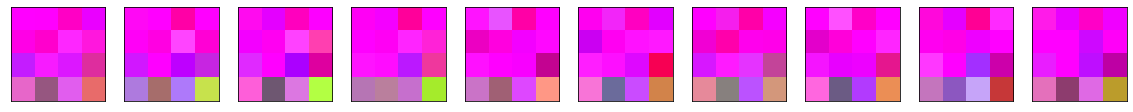

encoded_images_8x8


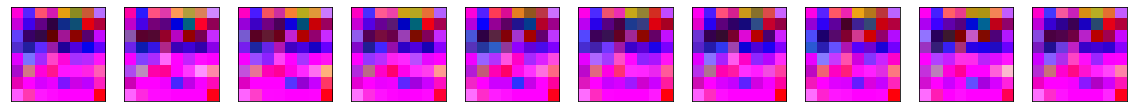

encoded_images_16x16


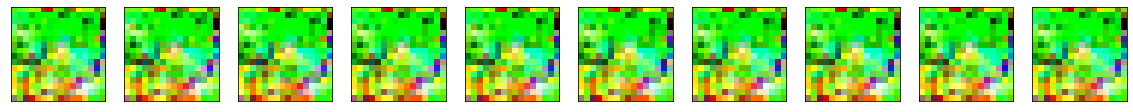

encoded_images_32x32


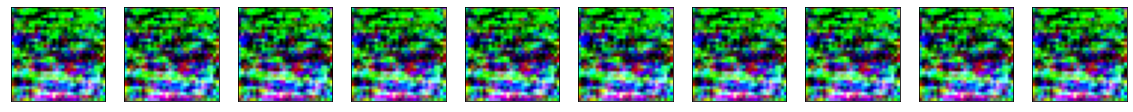

In [51]:
import matplotlib.pyplot as plt

num_images = 10

for k, v in sorted_encoded_images:
    print(k)
    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(v[i], cmap=plt.cm.binary)
    plt.show()

In [92]:
for k, v in sorted_anomaly_scores:
    print(k)
    print(v)

anomaly_scores_4x4
[-0.64256185 -1.0582483  -0.63784945 -0.6530247  -0.59345186 -0.7303417
 -1.2932968  -0.7255056  -0.616821   -0.8128561 ]
anomaly_scores_8x8
[-1.904646  -2.7464879 -1.920896  -2.2532477 -1.3298066 -2.5236478
 -3.6588118 -2.0579178 -1.7529304 -2.4537292]
anomaly_scores_16x16
[-4.7126236 -8.189863  -5.1558585 -6.863637  -4.016794  -5.617856
 -7.711044  -5.4585876 -6.1646733 -5.725337 ]
anomaly_scores_32x32
[ -6.54804   -11.017357   -7.150378   -8.866707   -5.343296   -7.2236466
 -10.816688   -7.7325616  -7.067927   -7.7384496]


In [93]:
for k, v in sorted_anomaly_flags:
    print(k)
    print(v)

anomaly_flags_4x4
[0 0 0 0 0 0 0 0 0 0]
anomaly_flags_8x8
[0 0 0 0 0 0 0 0 0 0]
anomaly_flags_16x16
[0 0 0 0 0 0 0 0 0 0]
anomaly_flags_32x32
[0 0 0 0 0 0 0 0 0 0]
